 # Transfer Learning with a Pre-Trained Deep Neural Network

Neural networks involve millions of parameters that are prohibitively difficult to train from scratch.  In this project, we will use the technique *fine-tuning* where we start with a large pre-trained network and then re-train only the final layers to adapt to a new task.  The method is also called *transfer learning* and can produce excellent results on very small datasets with very little computational time.

**Project Specifications :** Developing a classifier that can discriminate between two classes:  `cars` and `bicycles`. could be used in vehicle vision systems.

**Tasks :**
* Building a custom image dataset
* Fine tune the final layers of an existing deep neural network for a new classification task.
* Loading images with a `DataGenerator`.

Project trained on NVIDIA-500 GPU

## Dataset

* 1000 training images of cars
* 1000 training images of bicylces
* 300 test images of cars
* 300 test images of bicylces

dataset obtained from the FlickrAPI

## Loading a Pre-Trained Deep Neural Network

A pre-trained deep VGG16 network.

In [0]:
import keras

Using TensorFlow backend.


In [0]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense

import keras

import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from scipy import misc

%matplotlib inline

In [0]:
import tensorflow.keras.backend as K
K.clear_session()

In [0]:
nrow = 150
ncol = 150

* Setting `include_top=False` to not include the top layer
* Setting the `image_shape` to `height x width x 3` since the images are color.

In [0]:
pre_trained = 'vgg16'
nchan_in = 3

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input    
    
    
input_shape = (nrow,ncol,nchan_in)

base_model = applications.VGG16(include_top=False, 
                                weights='imagenet',
                                input_shape=input_shape)

Instructions for updating:
Colocations handled automatically by placer.


Creating a Sequential model and looping over the layers in `base_model.layers` and adding each layer to the new model.

In [0]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
model = Sequential()

for layer in base_model.layers:
    model.add(layer)
    
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       295168    
__________

Setting `layer.trainable = False`.  This way, we'll not have to *re-train* any of the existing layers.

In [0]:
for layer in model.layers:
    layer.trainable = False

Adding the following layers to `model`:
* A `Flatten()` layer which reshapes the outputs to a single channel.
* A fully-connected layer with 256 output units and `relu` activation
* A `Dropout(0.5)` layer.
* A final fully-connected layer.  Since this is a binary classification, there should be one output and `sigmoid` activation.

In [0]:
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation= 'sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model summary displaying the number of trainable parameters vs. the non-trainable parameters.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       295168    
__________

## Using Generators to Load Data

The `keras` package provides a `ImageDataGenerator` class that can fetch images on the fly from a directory of images.  Using multi-threading, training can be performed on one mini-batch while the image reader can read files for the next mini-batch. In addition to the reading the files, the `ImageDataGenerator` creates random deformations of the image to expand the total dataset size.  When the training data is limited, using data augmentation is very important.

In [0]:
train_data_dir = './train'
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [0]:
test_data_dir = './test'
batch_size = 32
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# test_generator = ...
test_generator = test_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')

Found 600 images belonging to 2 classes.


Function to display images.

In [0]:
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

The `train_generator.next()` method gets a minibatch of data `X,y`.  Displaying the first 8 images in the mini-batch and labeling the image with the class label.
The bicycles have `y=0` and cars have `y=1`.

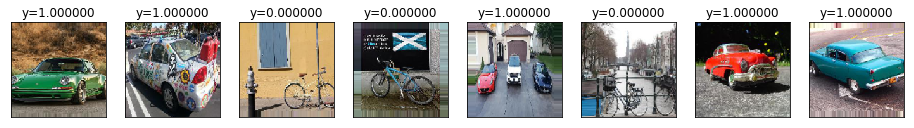

In [0]:
X, y = train_generator.next()

plt.figure(figsize=(16,16))
nplot = 8
for i in range(nplot):
    plt.subplot(1,nplot,i+1)
    disp_image(X[i,:,:,:])
    title = 'y={0:f}'.format(y[i].astype(float))
    plt.title(title)
    

## Training the Model

Compiling the using binary classification parameters for `loss` function, `optimizer` and `metrics`.

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

When using an `ImageDataGenerator`, we have to set two parameters manually:
* `steps_per_epoch =  training data size // batch_size`
* `validation_steps =  test data size // batch_size`

Obtaining the training and test data size from `train_generator.n` and `test_generator.n`, respectively.

In [0]:
steps_per_epoch =  train_generator.n // batch_size
validation_steps =  test_generator.n // batch_size

# Fitting the Model

`hist` - Records the history of the fit for plotting the training and validation accuracy curve.

In [0]:
nepochs = 5  # Number of epochs

# fit_generator function
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=nepochs,
    validation_data=test_generator,
    validation_steps=validation_steps)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
63/63 [==============================] - 382s 6s/step - loss: 0.5101 - acc: 0.8540 - val_loss: 0.1123 - val_acc: 0.9617
Epoch 2/5
63/63 [==============================] - 385s 6s/step - loss: 0.1804 - acc: 0.9290 - val_loss: 0.2044 - val_acc: 0.9300
Epoch 3/5
63/63 [==============================] - 394s 6s/step - loss: 0.1469 - acc: 0.9485 - val_loss: 0.0758 - val_acc: 0.9683
Epoch 4/5
63/63 [==============================] - 406s 6s/step - loss: 0.1228 - acc: 0.9515 - val_loss: 0.0683 - val_acc: 0.9767
Epoch 5/5
63/63 [==============================] - 395s 6s/step - loss: 0.1298 - acc: 0.9540 - val_loss: 0.0970 - val_acc: 0.9717


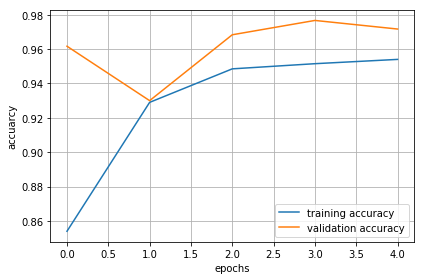

In [0]:
tr_accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'validation accuracy'])
plt.tight_layout()

Missclassified images: 


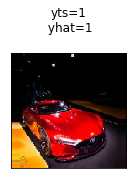

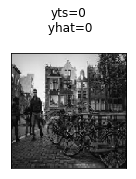

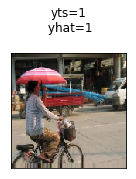

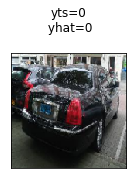

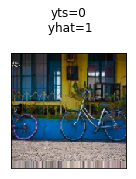

In [0]:
pred_error = []



while len(pred_error) < 5:    
    
    ## Plotting the Error Images
  
    Xts,yts = test_generator.next()
    yhat = (model.predict_classes(Xts)).ravel()
    for i in range(32):
        if(yts[i] != yhat[i]):
            pred_error.append(i)
            
for i in np.arange(len(pred_error)):
    plt.figure(figsize=(12,12))
    plt.subplot(1,len(pred_error),i+1)
    disp_image(X[pred_error[i],:,:,:])
    title = 'yts={0:d}\n yhat={1:d}\n '.format(yts[pred_error[i]].astype(int) , yhat[pred_error[i]].astype(int))
    plt.title(title)


print('Missclassified images: ', )